# Visualización de Datos con Seaborn - Tabla `sales`

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set(style='whitegrid')

In [5]:
# Cargar los datos limpios del análisis anterior
df = pd.read_csv('../3.4..DataQuality/output/ventas_limpias.csv')

# Convertir fechas al tipo datetime
df['orderdate'] = pd.to_datetime(df['orderdate'])
df['shippeddate'] = pd.to_datetime(df['shippeddate'])
df['requireddate'] = pd.to_datetime(df['requireddate'])

## 1. Ventas Totales por Estado del Pedido (`status`)

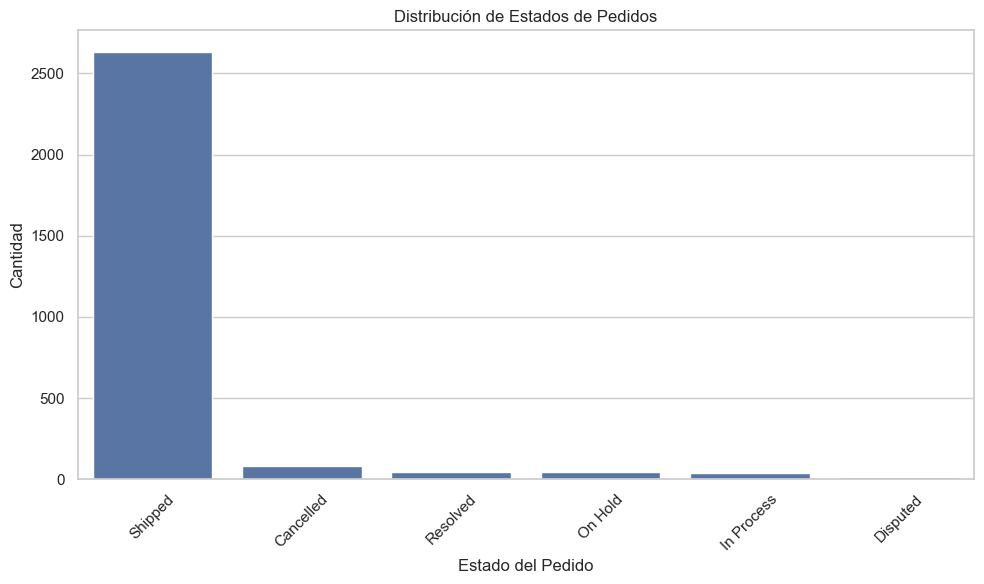

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index)
plt.title('Distribución de Estados de Pedidos')
plt.xticks(rotation=45)
plt.xlabel('Estado del Pedido')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

## 2. Top 10 Productos por Ventas Totales

C:\Users\ricar\AppData\Local\Temp\ipykernel_14288\132779805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_producto.values, y=ventas_por_producto.index, palette='viridis')


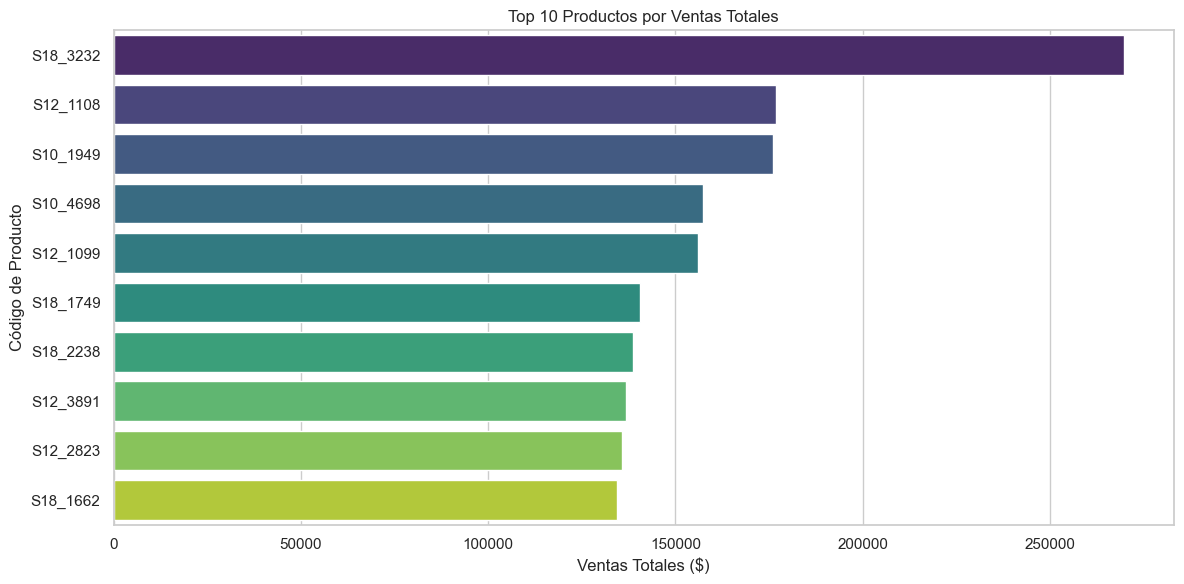

In [7]:
# Calcular ventas por producto
ventas_por_producto = df.groupby('productcode')['sales_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ventas_por_producto.values, y=ventas_por_producto.index, palette='viridis')
plt.title('Top 10 Productos por Ventas Totales')
plt.xlabel('Ventas Totales ($)')
plt.ylabel('Código de Producto')
plt.tight_layout()
plt.show()

## 3. Tendencia Mensual de Ventas

In [8]:
df['orderdate']

0      2003-01-06
1      2003-01-06
2      2003-01-06
3      2003-01-06
4      2003-01-09
          ...    
2854   2005-05-31
2855   2005-05-31
2856   2005-05-31
2857   2005-05-31
2858   2005-05-31
Name: orderdate, Length: 2859, dtype: datetime64[ns]

In [9]:
# Agrupar por mes
df_monthly = df.resample('ME', on='orderdate')['sales_amount'].sum().reset_index()

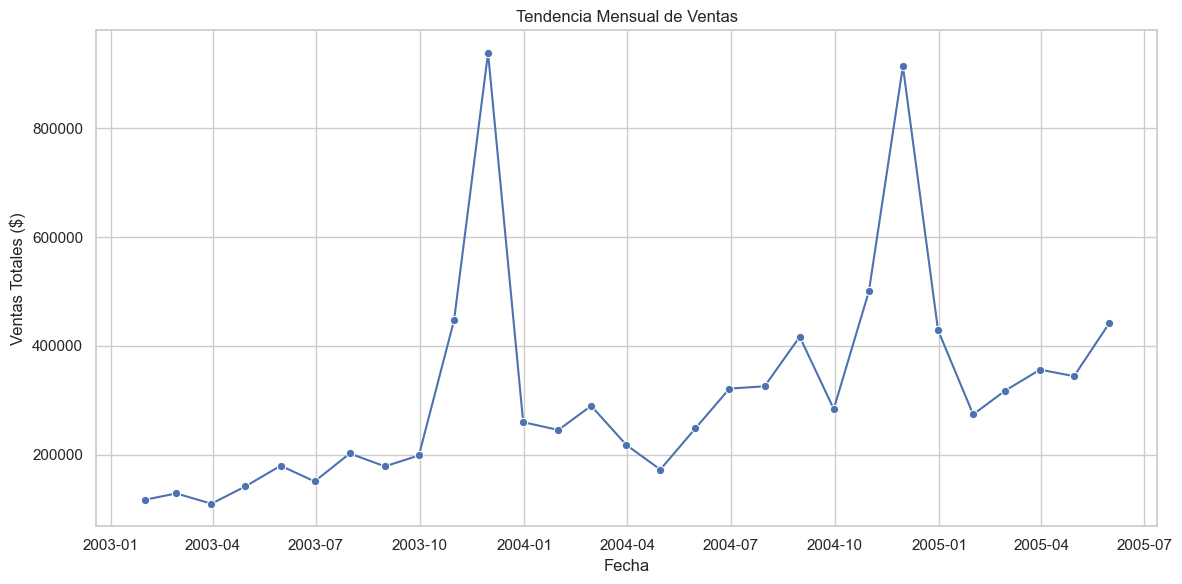

In [10]:

plt.figure(figsize=(12,6))
sns.lineplot(data=df_monthly, x='orderdate', y='sales_amount', marker='o')
plt.title('Tendencia Mensual de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Distribución de Precios Unitarios

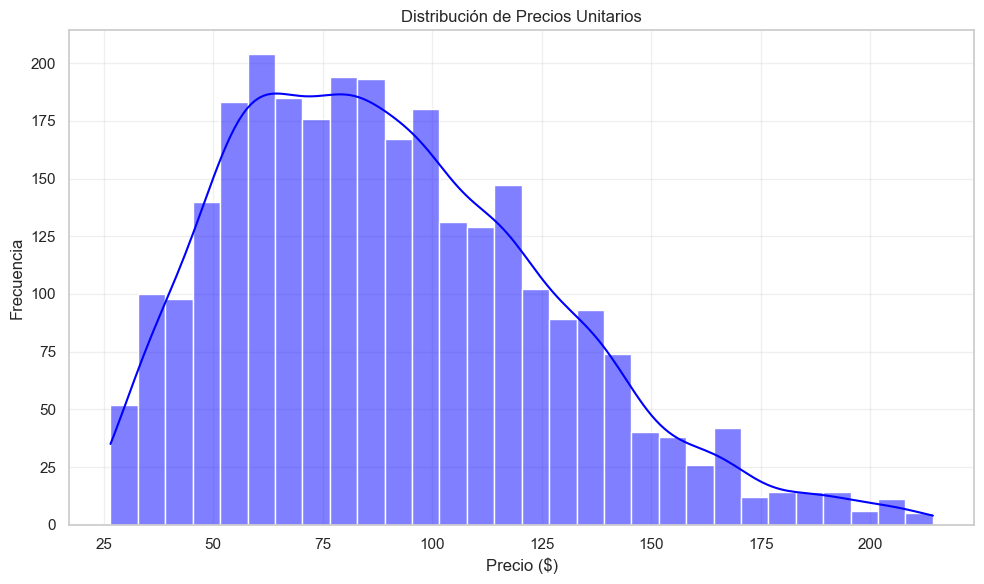

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['priceeach'], bins=30, kde=True, color='blue')
plt.title('Distribución de Precios Unitarios')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Boxplot de Cantidad Vendida por Línea de Pedido

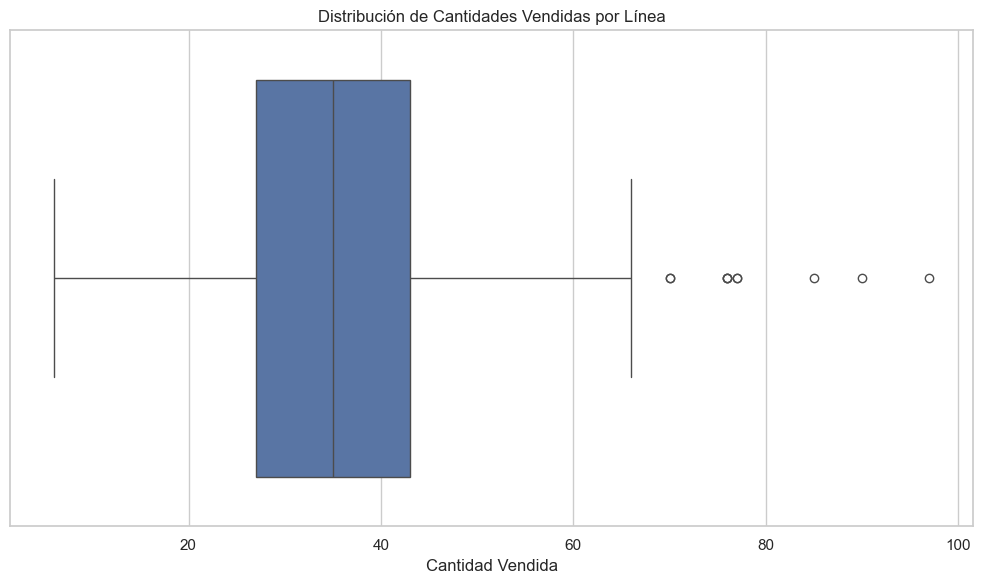

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['quantityordered'])
plt.title('Distribución de Cantidades Vendidas por Línea')
plt.xlabel('Cantidad Vendida')
plt.tight_layout()
plt.show()

## 6. Tiempo de Envío por Estado del Pedido

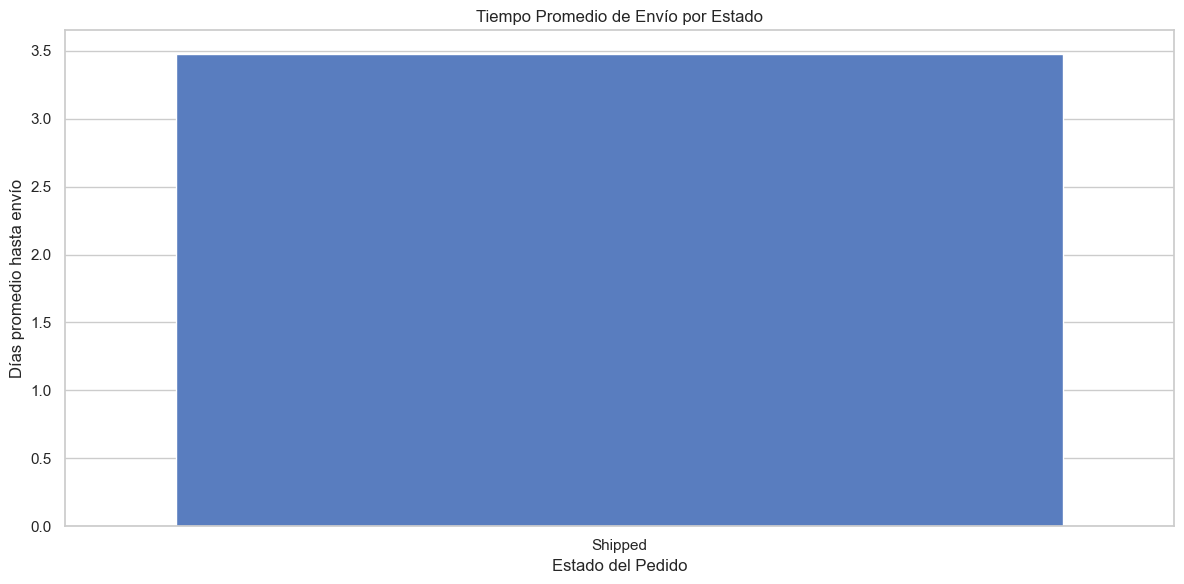

In [13]:
# Filtrar pedidos enviados
df_shipped = df[df['status'] == 'Shipped']

plt.figure(figsize=(12,6))
sns.barplot(data=df_shipped, x='status', y='days_to_ship', estimator=np.mean, errorbar=None, palette='muted', hue='status')
plt.title('Tiempo Promedio de Envío por Estado')
plt.xlabel('Estado del Pedido')
plt.ylabel('Días promedio hasta envío')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## 7. Relación entre Precio y Cantidad Vendida

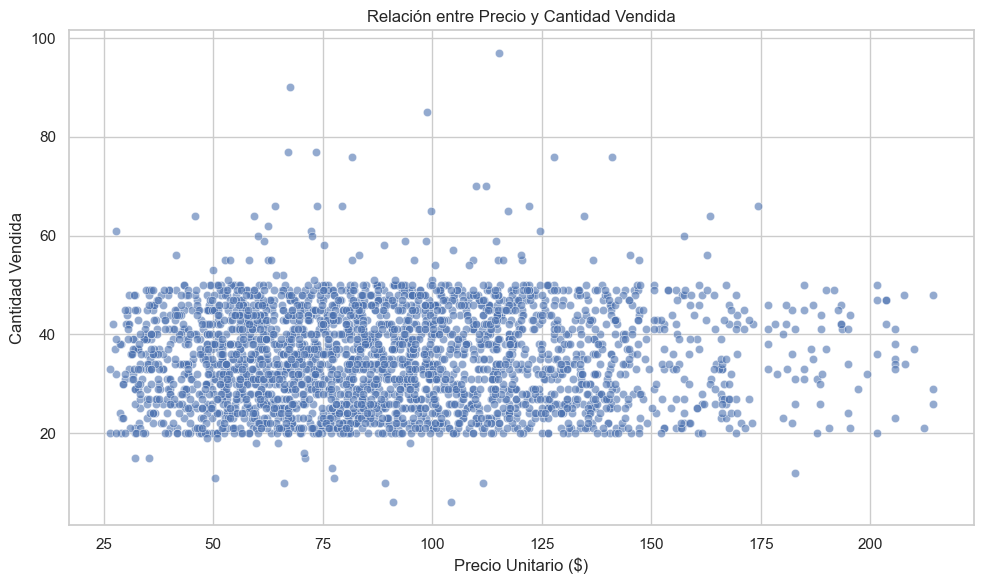

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='priceeach', y='quantityordered', alpha=0.6)
plt.title('Relación entre Precio y Cantidad Vendida')
plt.xlabel('Precio Unitario ($)')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.tight_layout()
plt.show()